In [31]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

from functions import *
from models import *

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [33]:
# Hyperparameters
batch_size = 512
noise_lambda = 32

In [34]:
train_loader, test_loader = data_prep(noise_lambda, batch_size, batch_size)

Trainset size: 60000
Testset size: 10000


In [35]:
#Example data visualization
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
# print(example_data)
print(example_data.shape, example_targets.shape)
print(example_targets[0][14], example_data[0][14])

torch.Size([512, 28, 28]) torch.Size([512, 28, 28])
tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,  34., 139.,
        253., 253., 253., 255., 230., 129., 111.,  63., 111.,  19., 221.,  37.,
          0.,   0.,   0.,   0.]) tensor([ 25.0575,   9.4871,   0.0000,  10.1493,   0.0000,   0.0000,  13.6529,
          0.0000,  32.3816,   8.1517,  64.7918, 118.7011, 218.6567, 255.0000,
        244.9715, 253.9712, 255.0000, 120.9677, 126.2818,  76.1063,  90.5571,
         49.4574, 177.3265,  49.7058,   0.0000,   8.7806,  27.8819,  14.5269])


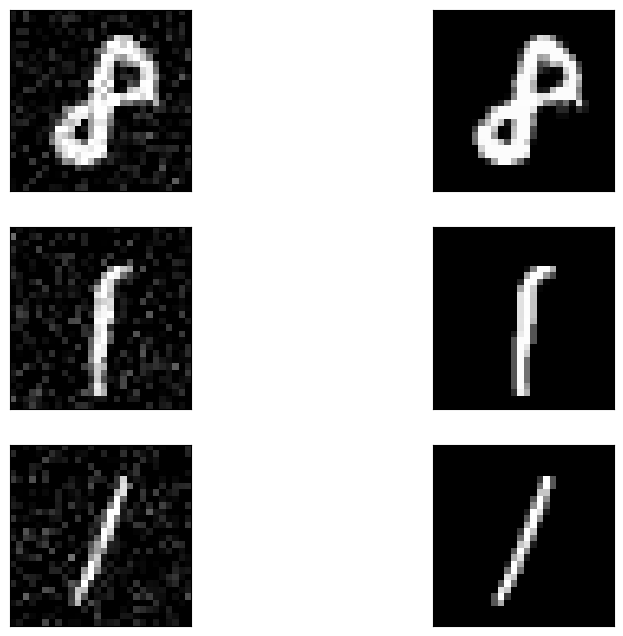

In [36]:
fig = plt.figure(figsize=(10, 8))
for i in range(0,6,2):
  # print(example_data[i].shape)
  plt.subplot(3,2,i+1)
  plt.imshow(example_data[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,2,i+2)
  plt.imshow(example_targets[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [37]:
model = CONV().to(device)
loss_module = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [38]:
train_losses = []
test_losses = []
num_epochs = 25

model.train()
for i in tqdm(range(num_epochs)):
    for x, y in train_loader:
        x = x.reshape(-1, 1, 28, 28).to(device)
        y = y.reshape(-1, 28*28).to(device)
        optimizer.zero_grad()
        preds = model(x)
        # print(preds.dtype)
        # print(y.dtype)
        # print(preds.shape, y.shape)
        loss = loss_module(preds, y)
        loss.backward()
        optimizer.step()
    print(f'Epoch: [{i+1}/{num_epochs}] \t Loss: {loss:.6f}')
    train_losses.append(loss.item())

  4%|▍         | 1/25 [00:01<00:37,  1.57s/it]

Epoch: [1/25] 	 Loss: 8217.540039


  8%|▊         | 2/25 [00:03<00:34,  1.49s/it]

Epoch: [2/25] 	 Loss: 8357.625977


 12%|█▏        | 3/25 [00:04<00:31,  1.43s/it]

Epoch: [3/25] 	 Loss: 8182.657227


 16%|█▌        | 4/25 [00:05<00:29,  1.41s/it]

Epoch: [4/25] 	 Loss: 8537.903320


 20%|██        | 5/25 [00:07<00:28,  1.42s/it]

Epoch: [5/25] 	 Loss: 8372.479492


 24%|██▍       | 6/25 [00:08<00:26,  1.40s/it]

Epoch: [6/25] 	 Loss: 8509.016602


 28%|██▊       | 7/25 [00:09<00:25,  1.40s/it]

Epoch: [7/25] 	 Loss: 8475.456055


 32%|███▏      | 8/25 [00:11<00:23,  1.41s/it]

Epoch: [8/25] 	 Loss: 8111.621582


 36%|███▌      | 9/25 [00:12<00:22,  1.40s/it]

Epoch: [9/25] 	 Loss: 8597.458984


 40%|████      | 10/25 [00:14<00:20,  1.39s/it]

Epoch: [10/25] 	 Loss: 8472.629883


 44%|████▍     | 11/25 [00:15<00:19,  1.39s/it]

Epoch: [11/25] 	 Loss: 8053.051758


 48%|████▊     | 12/25 [00:16<00:18,  1.41s/it]

Epoch: [12/25] 	 Loss: 8332.653320


 52%|█████▏    | 13/25 [00:18<00:16,  1.40s/it]

Epoch: [13/25] 	 Loss: 8216.736328


 56%|█████▌    | 14/25 [00:19<00:15,  1.40s/it]

Epoch: [14/25] 	 Loss: 8222.746094


 60%|██████    | 15/25 [00:21<00:13,  1.40s/it]

Epoch: [15/25] 	 Loss: 8485.306641


 64%|██████▍   | 16/25 [00:22<00:12,  1.39s/it]

Epoch: [16/25] 	 Loss: 8347.554688


 68%|██████▊   | 17/25 [00:23<00:11,  1.39s/it]

Epoch: [17/25] 	 Loss: 8305.690430


 72%|███████▏  | 18/25 [00:25<00:09,  1.41s/it]

Epoch: [18/25] 	 Loss: 8006.543945


 76%|███████▌  | 19/25 [00:26<00:08,  1.40s/it]

Epoch: [19/25] 	 Loss: 8437.988281


 80%|████████  | 20/25 [00:28<00:06,  1.40s/it]

Epoch: [20/25] 	 Loss: 8209.918945


 84%|████████▍ | 21/25 [00:29<00:05,  1.42s/it]

Epoch: [21/25] 	 Loss: 8552.028320


 88%|████████▊ | 22/25 [00:31<00:04,  1.42s/it]

Epoch: [22/25] 	 Loss: 8219.791992


 92%|█████████▏| 23/25 [00:32<00:02,  1.41s/it]

Epoch: [23/25] 	 Loss: 8253.843750


 96%|█████████▌| 24/25 [00:33<00:01,  1.43s/it]

Epoch: [24/25] 	 Loss: 8442.943359


100%|██████████| 25/25 [00:35<00:00,  1.41s/it]

Epoch: [25/25] 	 Loss: 8556.358398


[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

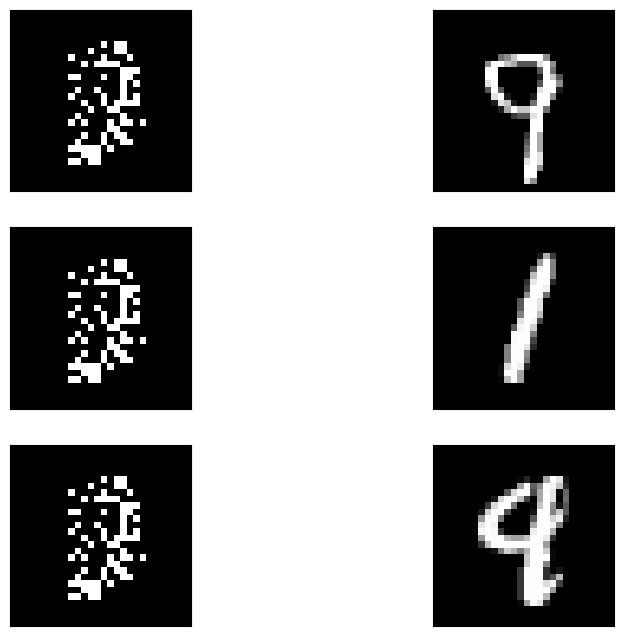

In [39]:
#Evaluation
preds_list = []
out_list = []
test_losses = []

model.eval()
for x, y in test_loader:
    x = x.reshape(-1, 1, 28, 28).to(device)
    y = y.reshape(-1, 28*28).to(device)
    optimizer.zero_grad()
    preds = model(x)
    preds_list.append(preds)
    out_list.append(y)
    loss = loss_module(preds, y)
    test_losses.append(loss.item())

print(preds_list[0].cpu().detach().numpy()[0])
print(out_list[0].cpu().detach().numpy()[0])

#Visualize results
fig = plt.figure(figsize=(10, 8))
for i in range(0,6,2):
  plt.subplot(3,2,i+1)
  plt.imshow(preds_list[i].cpu().detach().numpy()[0].reshape(28,28), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,2,i+2)
  plt.imshow(out_list[i].cpu().detach().numpy()[0].reshape(28,28), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])